## K-Means 

Clustering of Football Clubs: You are given a dataset containing football
player information. The objective is to cluster different football clubs based on various attributes.

1. Your initial step should be extracting the club information from the player dataset. It will involve computing the “average player” of each club. One way is to group the dataset by “club name id” and calculate the mean values for all relevant features. You are encouraged to explore different ideas.

2. Now, use K-Means to cluster the football clubs. You can determine the criteria for clustering by considering various features. For example - First try clustering using all features, after that try again using only features representing player stats or financial attributes.

3. To find the optimal number of clusters, K, you can use the elbow method.

In [1]:
import pandas as pd
import numpy as np
import datapurifier as dp
import matplotlib.pyplot as plt
from datapurifier import Mleda, MlReport

In [2]:
df = pd.read_csv("football.csv")

In [3]:
report = MlReport(df)
report


Sample of Dataframe:


,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
7278,259695,H. Espínola,61,61,220000.0,500.0,29,182,85,114688.0,Guaireña FC,Paraguayan Primera División,1.0,1.0,NaN,Right,1,1,1,Medium/Medium,Normal (170-185),473000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9,14,26,7,14,13,13,21,11,28,17,28,55,44,45,58,22,58,5,28,13,8,27,19,25,8,10,11,61,62,60,61,60,24.0,0
1890,237532,Rodrigo,73,73,2800000.0,1000.0,28,176,73,393.0,PAOK,Greek Super League,1.0,2.0,NaN,Right,2,3,1,High/Medium,Normal (170-185),6200000.0,NaN,NaN,74.0,60.0,73.0,73.0,69.0,71.0,74,48,59,73,44,73,72,68,72,71,75,73,74,70,76,78,80,74,70,71,65,72,67,76,67,73,69,71,70,12,14,9,8,13,NaN,0
3894,200954,D. Thomalla,68,68,1200000.0,11000.0,28,186,75,111235.0,1. FC Heidenheim 1846,German 2. Bundesliga,2.0,11.0,NaN,Right,3,3,1,Medium/Medium,Lean (185+),1900000.0,NaN,NaN,64.0,66.0,63.0,68.0,32.0,67.0,66,68,68,67,66,67,58,57,54,70,68,60,68,70,63,68,81,82,64,61,53,32,72,61,57,58,24,30,30,14,15,8,14,13,NaN,1
3601,232626,Oh Jae Suk,69,69,1000000.0,3000.0,31,176,73,110765.0,Incheon United FC,Korean K League 1,1.0,34.0,NaN,Right,4,2,1,Medium/Medium,Normal (170-185),1300000.0,NaN,NaN,60.0,35.0,58.0,66.0,69.0,70.0,65,31,63,65,31,66,31,32,53,66,59,61,65,69,65,37,55,74,72,35,62,67,61,56,34,61,69,71,70,8,5,14,13,10,NaN,0
433,210625,K. Mbabu,79,82,21000000.0,59000.0,26,184,83,175.0,VfL Wolfsburg,German 1. Bundesliga,1.0,19.0,NaN,Right,3,3,2,High/Medium,Normal (170-185),37300000.0,NaN,"Early Crosser, Speed Dribbler (AI)",88.0,51.0,69.0,73.0,74.0,80.0,77,49,67,69,39,72,64,48,65,74,88,88,76,73,73,66,78,91,78,44,74,70,72,68,35,71,75,76,80,8,7,7,14,14,NaN,0
5545,209364,C. Brown,65,66,750000.0,2000.0,27,174,69,111395.0,Brisbane Roar,Australian Hyundai A-League,1.0,3.0,NaN,Left,2,2,1,High/Medium,Lean (170-185),994000.0,NaN,NaN,72.0,44.0,59.0,61.0,57.0,67.0,68,46,52,63,34,59,52,39,58,60,72,72,69,57,77,39,83,79,68,42,47,55,59,50,49,47,57,58,60,14,12,15,10,16,NaN,0
6248,241982,E. Watt,64,74,1200000.0,3000.0,21,175,72,1804.0,Bradford City,English League Two,4.0,18.0,NaN,Right,4,2,1,Medium/Medium,Normal (170-185),2300000.0,NaN,"Long Passer (AI), Long Shot Taker (AI), Playma...",67.0,51.0,63.0,62.0,57.0,67.0,60,46,45,65,42,59,62,59,67,62,68,67,72,59,73,60,66,91,54,56,68,58,54,62,47,63,59,59,57,9,6,7,11,9,NaN,0
6208,236365,C. Wood,64,68,775000.0,3000.0,24,177,78,1958.0,Leyton Orient,English League Two,4.0,3.0,NaN,Left,2,2,1,High/Medium,Normal (170-185),1400000.0,NaN,Early Crosser,76.0,49.0,55.0,61.0,57.0,69.0,61,44,48,55,30,60,40,41,52,57,76,76,73,57,75,60,69,91,62,55,60,58,57,56,46,56,58,59,58,9,15,7,15,14,NaN,0
4839,253473,S. Ricci,67,84,2600000.0,8000.0,19,178,72,1746.0,Empoli,Italian Serie A,1.0,28.0,NaN,Right,3,3,1,Medium/Medium,Lean (170-185),6300000.0,NaN,NaN,67.0,44.0,67.0,68.0,62.0,64.0,57,30,52,73,52,66,56,59,69,72,67,67,69,65,69,65,63,74,60,48,61,63,51,69,50,69,63,63,62,14,12,6,11,13,NaN,1
6728,251908,O. Villadsen,63,73,1000000.0,1000.0,19,173,70,1788.0,FC Nordsjælland,Danish Superliga,1.0,23.0,NaN,Right,2,3,1,Hig

Shape of DataFrame:  (7772, 66)

Categorical columns: ['short_name', 'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'player_traits']

Numerical columns: ['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_

,column,unique_count,unique_percent
0,sofifa_id,7772,100.000000
1,short_name,7524,96.809058
2,overall,46,0.591868
3,potential,42,0.540401
4,value_eur,244,3.139475
...,...,...,...
61,goalkeeping_kicking,71,0.913536
62,goalkeeping_positioning,67,0.862069
63,goalkeeping_reflexes,59,0.759135
64,goalkeeping_speed,51,0.656202


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
count,7772.000000,7772.000000,7772.000000,7.706000e+03,7711.000000,7772.000000,7772.000000,7772.000000,7711.000000,7711.000000,7711.000000,533.000000,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,709.000000,7772.000000
mean,223576.030108,68.864642,72.068708,4.356581e+06,12104.526002,26.784483,181.484174,75.547735,51470.375178,1.360913,16.528466,12.067542,2.998713,2.457669,1.147967,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,40.332863,0.456253
std,26710.971306,5.951090,6.075526,1.047773e+07,24717.270914,4.318905,6.861546,7.046195,54493.246508,0.760792,15.471724,6.937905,0.685530,0.784704,0.471261,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,10.211288,0.498115
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,17.000000,156.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,207560.750000,65.000000,68.000000,7.250000e+05,2000.000000,24.000000,177.000000,70.000000,503.000000,1.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,0.000000
50%,2


Null Information of Dataframe: 


There are total 18 columns having null values out of 66 columns in dataframe



,column_name,null_rows,null_percentage
0,nation_jersey_number,7239,93.142048
1,goalkeeping_speed,7063,90.877509
2,player_tags,6900,88.780237
3,player_traits,2901,37.326300
4,pace,709,9.122491
5,shooting,709,9.122491
6,passing,709,9.122491
7,dribbling,709,9.122491
8,defending,709,9.122491
9,physic,709,9.122491


### Average Player of each club

In [4]:
unique_clubs_name = df["club_name"].unique() ## one of the club name is NaN, since its not mention
total_clubs = len(unique_clubs_name)
print("Total number of clubs: ", total_clubs-1)

Total number of clubs:  701


In [5]:
club_info = df.groupby('club_team_id').agg({
    'age': 'mean',
    'height_cm': 'mean',
    'physic': 'mean',
    'shooting': 'mean',
    'passing': 'mean',
    'defending': 'mean',
    'pace': 'mean',
}).reset_index()

club_info

,club_team_id,age,height_cm,physic,shooting,passing,defending,pace
0,1.0,25.454545,183.727273,73.5,62.0,73.6,65.1,74.4
1,2.0,24.909091,182.454545,70.5,62.5,70.0,63.5,73.3
2,3.0,24.181818,183.000000,68.3,54.3,60.4,58.7,73.6
3,4.0,26.363636,182.363636,68.1,50.4,56.6,53.6,71.3
4,5.0,26.818182,182.909091,75.2,63.0,75.6,69.3,72.4
...,...,...,...,...,...,...,...,...
696,115530.0,25.000000,177.272727,67.7,58.3,63.1,54.4,70.5
697,115535.0,25.636364,177.727273,60.1,47.5,55.3,53.2,64.2
698,115536.0,25.909091,182.000000,61.8,45.4,49.6,48.4,62.1
699,115716.0,25.636364,179.727273,67.0,47.4,56.7,52.5,70.5


### Using K-Means to cluster the football clubs

In [6]:
## Preprocessing dataset

### Removing categorical columns, more null values columns, unrelated columns (ID, ...)

required_columns = ["overall", 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
        'age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing',
        'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'contribution_type']

df1 = df[required_columns].copy()

# data = df2.dropna()
data = df1.fillna(df1.median())
print("Dataframe Shape: ", data.shape)

Dataframe Shape:  (7772, 49)


In [7]:
data.head()

,overall,potential,value_eur,wage_eur,release_clause_eur,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,contribution_type
0,93,93,78000000.0,320000.0,144300000.0,34,170,72,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,1
1,92,92,119500000.0,270000.0,197200000.0,32,185,81,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,1
2,91,91,45000000.0,270000.0,83300000.0,36,187,83,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,1
3,91,91,129000000.0,270000.0,238700000.0,29,175,68,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,1
4,91,91,125500000.0,350000.0,232200000.0,30,181,70,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,1


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[ 4.05588084  3.4454033   7.05908175 ... -0.10482643 -0.447685
   1.09168007]
 [ 3.88783357  3.28079792 11.03570387 ... -0.45423788 -0.33568449
   1.09168007]
 [ 3.71978631  3.11619254  3.89694851 ... -0.10482643 -0.27968424
   1.09168007]
 ...
 [-3.17015154 -1.98657433 -0.40546916 ... -0.33776739 -0.50368526
  -0.91601929]
 [-3.3381988  -2.80960125 -0.40834382 ... -0.22129691 -0.55968551
  -0.91601929]
 [-3.50624606 -2.48039048 -0.40546916 ... -0.04659119 -0.16768373
   1.09168007]]


#### Clustering on all features

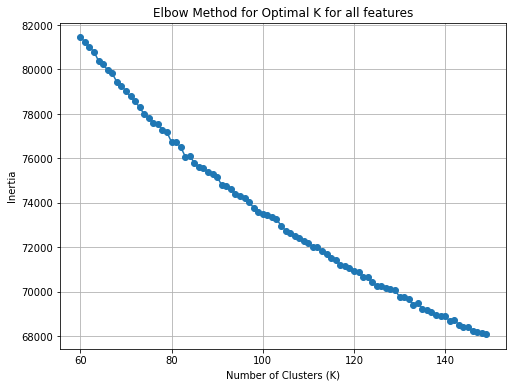

[81441.54286583656, 81254.11743426163, 81000.041655207, 80800.40194063453, 80379.53551797748, 80245.86471244287, 79958.61779224331, 79824.18073639146, 79438.44881959961, 79278.42787572014, 79018.08194296468, 78794.44875032712, 78565.48858333049, 78298.01193692099, 77983.96012903073, 77838.89324726892, 77603.59725846126, 77548.59050288063, 77286.52479570766, 77169.04534500209, 76731.7872099188, 76731.84264909572, 76515.45306164121, 76081.46996842975, 76109.0004501975, 75796.61928833179, 75603.22852155962, 75567.70518720405, 75369.72758256568, 75318.09612287594, 75183.74892923402, 74784.81145026858, 74777.15186151734, 74629.50745935104, 74409.9763667223, 74312.48180765883, 74197.34914534097, 74031.18692828779, 73783.83722908788, 73595.8934020545, 73480.55120761965, 73440.52716646937, 73380.1051204014, 73273.02857485307, 72978.34896076584, 72752.06677673913, 72629.01167051432, 72523.58236405539, 72404.08271400454, 72302.36869578331, 72191.31694872137, 72007.1587678926, 72024.93586301475, 

In [9]:
from sklearn.cluster import KMeans

# Initializing a list to store the inertia for different values of K for all features
inertia = []

for k in range(60,150):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(60,150), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K for all features')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
print(inertia)

In [10]:
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['cluster'] = clusters

In [11]:
data.head()

,overall,potential,value_eur,wage_eur,release_clause_eur,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,contribution_type,cluster
0,93,93,78000000.0,320000.0,144300000.0,34,170,72,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,1,74
1,92,92,119500000.0,270000.0,197200000.0,32,185,81,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,1,131
2,91,91,45000000.0,270000.0,83300000.0,36,187,83,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,1,15
3,91,91,129000000.0,270000.0,238700000.0,29,175,68,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,1,74
4,91,91,125500000.0,350000.0,232200000.0,30,181,70,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,1,74


#### Clustering on all financial features

In [9]:
financial_stats_data = data[['wage_eur', 'value_eur', 'overall']]

scaler2 = StandardScaler()
financial_stats_scaled_data = scaler.fit_transform(financial_stats_data)
print(financial_stats_scaled_data)

# player_stats_data = data[['potential','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'skill_curve',
#        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
#        'movement_agility', 'movement_reactions', 'movement_balance',
#        'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength']]
# player_stats_data.shape

[[12.50398742  7.05908175  4.05588084]
 [10.47384964 11.03570387  3.88783357]
 [10.47384964  3.89694851  3.71978631]
 ...
 [-0.44829162 -0.40546916 -3.17015154]
 [-0.40768886 -0.40834382 -3.3381988 ]
 [-0.45641217 -0.40546916 -3.50624606]]


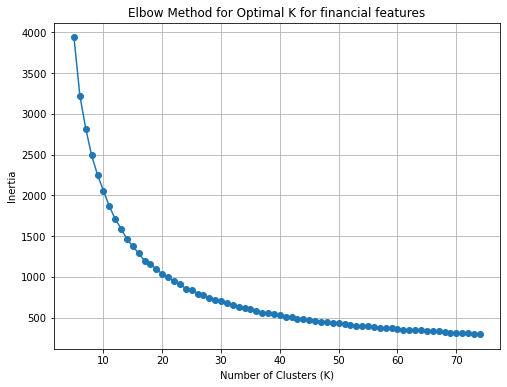

[3935.071248424539, 3221.6405976121787, 2817.627886885766, 2488.201601986096, 2250.1942082174105, 2058.303569812326, 1863.9631677649359, 1712.2965623323898, 1590.8192428998802, 1463.7345554870435, 1374.6370947421713, 1286.7979062306085, 1199.512321343433, 1154.8624475419497, 1092.0481937622726, 1036.018096594296, 994.2651912504164, 943.8693162399902, 914.1819559411738, 853.3515523330574, 834.2660362124673, 795.4390580529005, 772.9822908735729, 745.7956352222918, 719.0412280895628, 698.3768778356491, 677.2401306953714, 654.4228843416346, 632.9293533868322, 623.2871165111229, 609.9243812938092, 584.8483569996911, 559.4187806333936, 552.7211648225559, 542.2697441499924, 529.5509127228329, 513.2226514710587, 505.48251437528234, 487.37152884888206, 479.7150975764133, 476.71138287913243, 461.04314348904296, 451.7495691427214, 443.67914571215, 435.0268990123161, 429.75219086548026, 416.3989826100222, 410.813521045589, 403.187630398256, 397.4562659234672, 393.342345693355, 387.31612470706466, 

In [15]:
inertia = []

for k in range(5,75): 
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(financial_stats_scaled_data)
    inertia.append(kmeans.inertia_)
l = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.plot(range(5,75), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K for financial features')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
print(inertia)

In [11]:
## By Elbow method we found out that optimal k value is 30, therefore we train the model for it

kmeans = KMeans(n_clusters=30, random_state=84)
kmeans.fit(financial_stats_scaled_data)

KMeans(n_clusters=30, random_state=84)

In [12]:
clusters = kmeans.fit_predict(financial_stats_scaled_data)

# Add cluster labels to the original dataset
financial_stats_data['financial_cluster'] = clusters
financial_stats_data.head()

,wage_eur,value_eur,overall,financial_cluster
0,320000.0,78000000.0,93,18
1,270000.0,119500000.0,92,24
2,270000.0,45000000.0,91,18
3,270000.0,129000000.0,91,24
4,350000.0,125500000.0,91,24


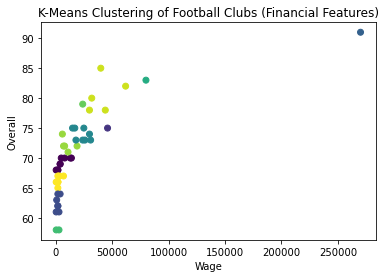

In [66]:
import matplotlib.pyplot as plt

small_dataset = financial_stats_data.sample(50)
# Visualize the clusters 
plt.scatter(small_dataset['wage_eur'], small_dataset['overall'], c=small_dataset['financial_cluster'], cmap='viridis')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('K-Means Clustering of Football Clubs (Financial Features)')
plt.show()